In [3]:
import os
import random

dataset_path = '../../data/vehicle-type-detection/'

def select_random_image():
    categories = ['hatchback', 'motorcycle', 'pickup', 'sedan', 'suv']
    
    selected_category = random.choice(categories)
    
    category_path = os.path.join(dataset_path, selected_category)
    
    image_files = os.listdir(category_path)
    
    selected_image = random.choice(image_files)
    
    image_path = os.path.join(category_path, selected_image)
    
    return image_path


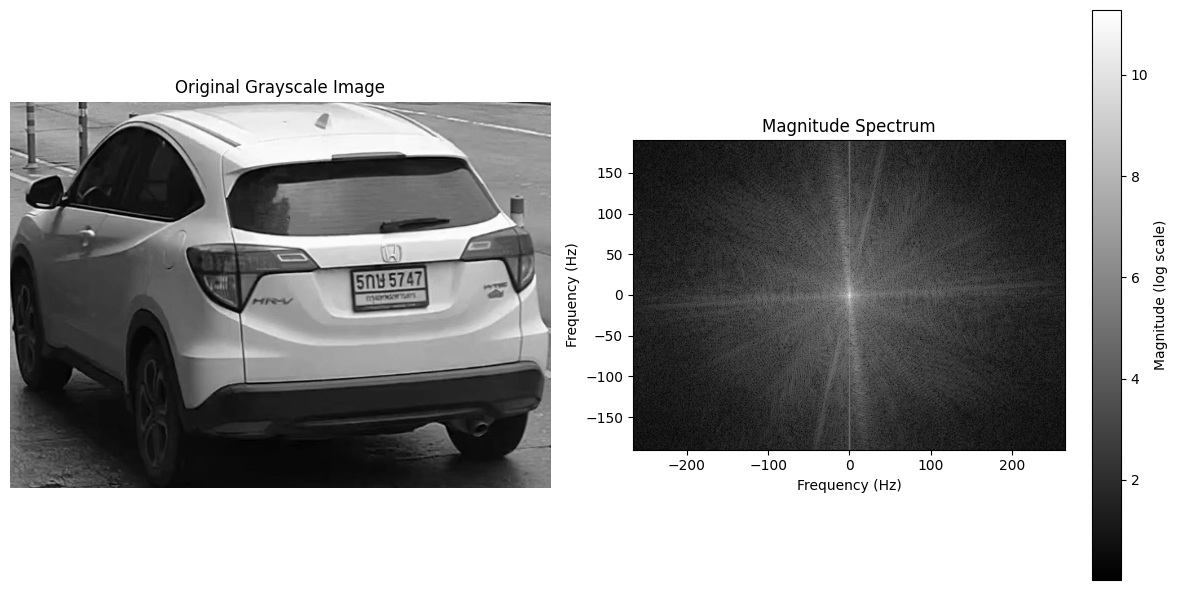

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from skimage import io, color

# Load and preprocess the image
image_path = select_random_image()  # Replace this with your specific file path if needed
image = io.imread(image_path)  
grayscale_image = color.rgb2gray(image)

# Compute DFT and magnitude spectrum
dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)
magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)

# Frequency ranges for labeling
rows, cols = grayscale_image.shape
freq_y = np.fft.fftfreq(rows).reshape(-1, 1)
freq_x = np.fft.fftfreq(cols).reshape(1, -1)

# Prepare the plot
plt.figure(figsize=(12, 6))

# Grayscale image
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Magnitude spectrum with axes
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray', extent=[-cols//2, cols//2, -rows//2, rows//2])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude (log scale)')

# Show the plots
plt.tight_layout()
plt.show()


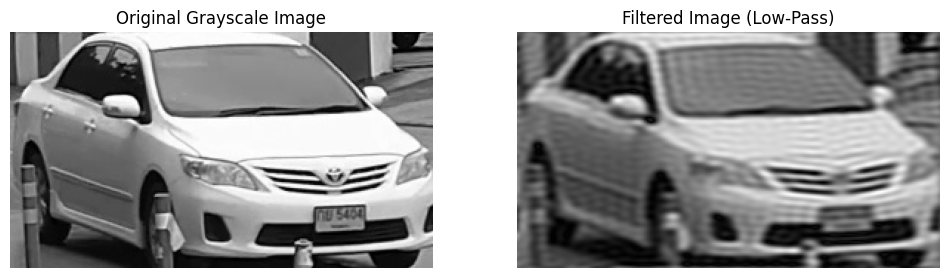

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

image_path = select_random_image()  
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)  

rows, cols = grayscale_image.shape
crow, ccol = rows // 2, cols // 2  
radius = 30  

low_pass_filter = np.zeros((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
low_pass_filter[mask_area] = 1

dft_filtered = dft_shifted * low_pass_filter

dft_filtered_shifted_back = ifftshift(dft_filtered)
filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

plt.show()


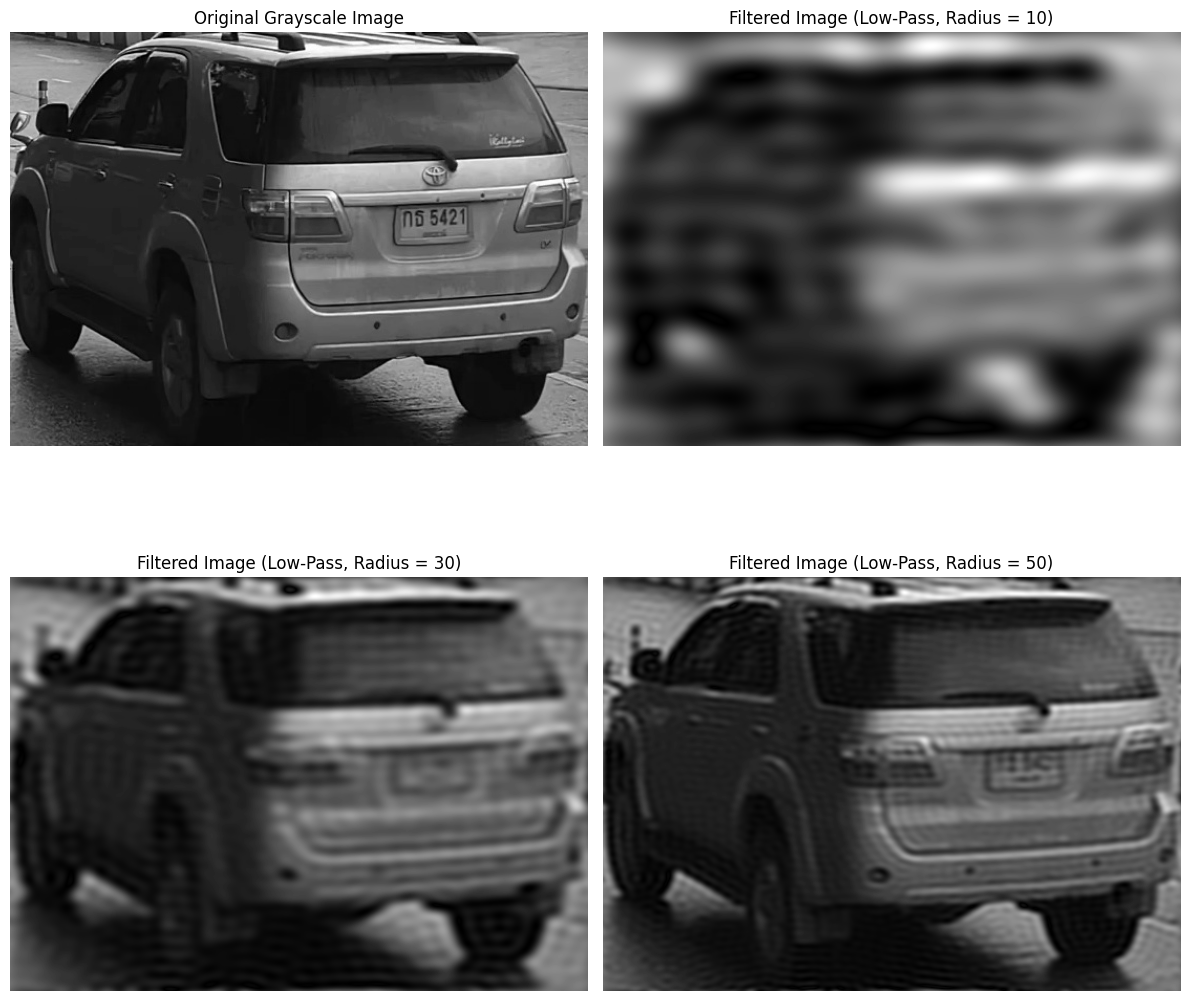

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

# Load and preprocess the image
image_path = select_random_image()  # Replace with your image path if needed
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

# Perform DFT and shift to frequency domain
dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)

# Define filter radii
radii = [10, 30, 50]

# Prepare the plot
plt.figure(figsize=(12, 12))

# Display the original grayscale image at the top
plt.subplot(2, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display low-pass filtered images
for i, radius in enumerate(radii):
    # Create a low-pass filter for each radius
    rows, cols = grayscale_image.shape
    crow, ccol = rows // 2, cols // 2
    low_pass_filter = np.zeros((rows, cols), np.uint8)
    y, x = np.ogrid[:rows, :cols]
    mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
    low_pass_filter[mask_area] = 1

    # Apply the filter
    dft_filtered = dft_shifted * low_pass_filter
    dft_filtered_shifted_back = ifftshift(dft_filtered)
    filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

    # Plot the filtered image
    plt.subplot(2, 2, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image (Low-Pass, Radius = {radius})')
    plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


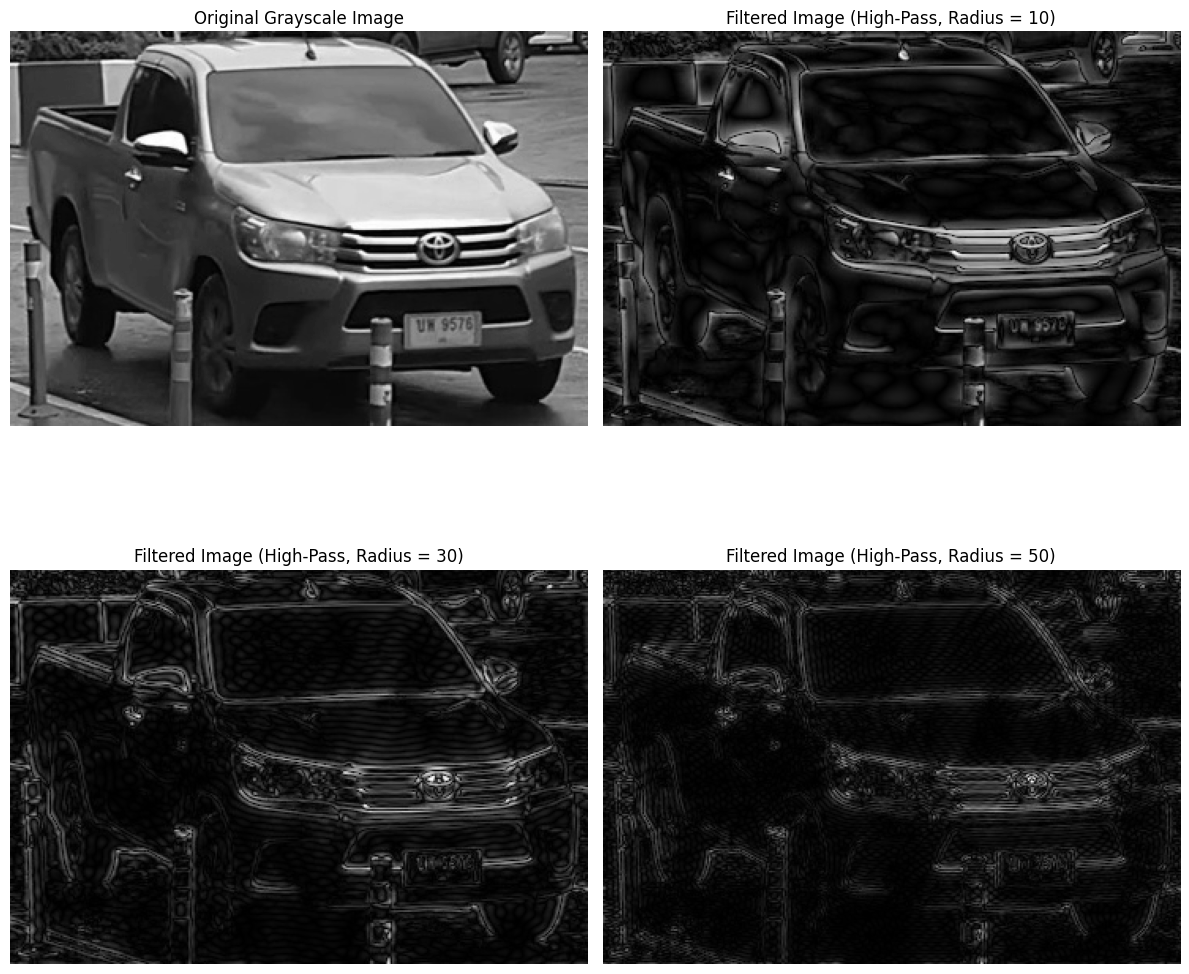

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

# Load and preprocess the image
image_path = select_random_image()  # Replace with your image path if needed
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

# Perform DFT and shift to frequency domain
dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)

# Define filter radii
radii = [10, 30, 50]

# Prepare the plot
plt.figure(figsize=(12, 12))

# Display the original grayscale image at the top
plt.subplot(2, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display high-pass filtered images
for i, radius in enumerate(radii):
    # Create a high-pass filter for each radius
    rows, cols = grayscale_image.shape
    crow, ccol = rows // 2, cols // 2
    high_pass_filter = np.ones((rows, cols), np.uint8)
    y, x = np.ogrid[:rows, :cols]
    mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
    high_pass_filter[mask_area] = 0

    # Apply the filter
    dft_filtered = dft_shifted * high_pass_filter
    dft_filtered_shifted_back = ifftshift(dft_filtered)
    filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

    # Plot the filtered image
    plt.subplot(2, 2, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image (High-Pass, Radius = {radius})')
    plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


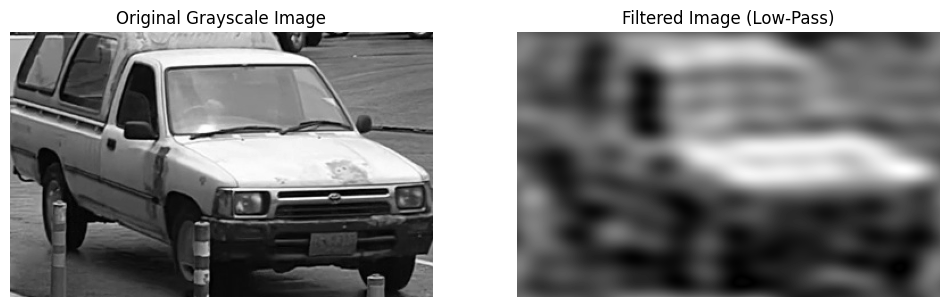

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

image_path = select_random_image()  
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)  

rows, cols = grayscale_image.shape
crow, ccol = rows // 2, cols // 2  
radius = 10  

low_pass_filter = np.zeros((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
low_pass_filter[mask_area] = 1

dft_filtered = dft_shifted * low_pass_filter

dft_filtered_shifted_back = ifftshift(dft_filtered)
filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

plt.show()


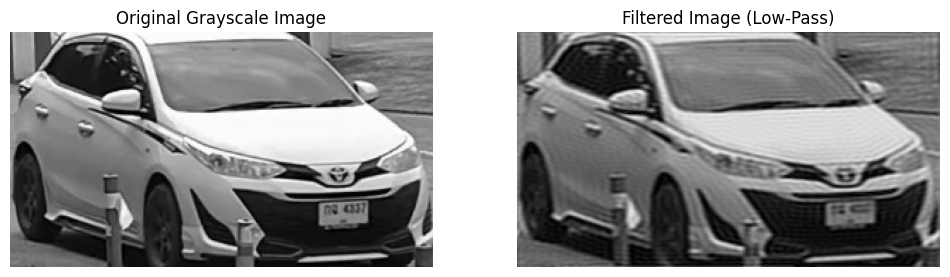

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

image_path = select_random_image()  
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)  

rows, cols = grayscale_image.shape
crow, ccol = rows // 2, cols // 2  
radius = 50  

low_pass_filter = np.zeros((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
low_pass_filter[mask_area] = 1

dft_filtered = dft_shifted * low_pass_filter

dft_filtered_shifted_back = ifftshift(dft_filtered)
filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

plt.show()


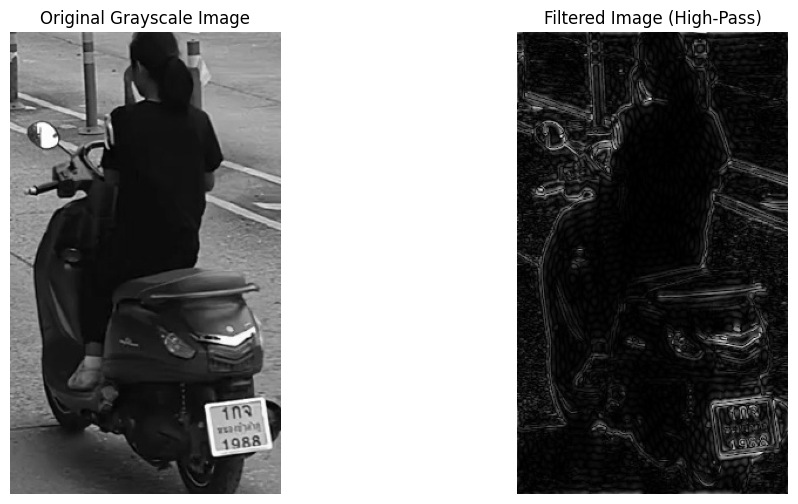

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

image_path = select_random_image() 
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)  

rows, cols = grayscale_image.shape
crow, ccol = rows // 2, cols // 2  
radius = 30  

high_pass_filter = np.ones((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
high_pass_filter[mask_area] = 0 

dft_filtered = dft_shifted * high_pass_filter

dft_filtered_shifted_back = ifftshift(dft_filtered)
filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.axis('off')

plt.show()



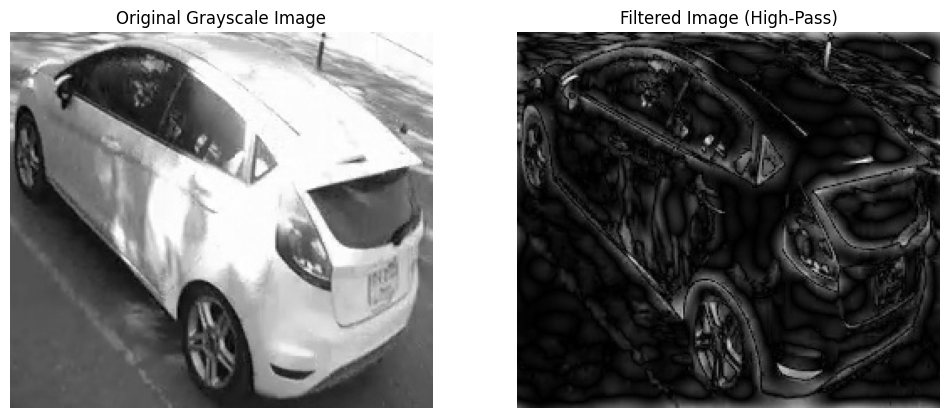

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

image_path = select_random_image() 
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)  

rows, cols = grayscale_image.shape
crow, ccol = rows // 2, cols // 2  
radius = 10  

high_pass_filter = np.ones((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
high_pass_filter[mask_area] = 0 

dft_filtered = dft_shifted * high_pass_filter

dft_filtered_shifted_back = ifftshift(dft_filtered)
filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.axis('off')

plt.show()



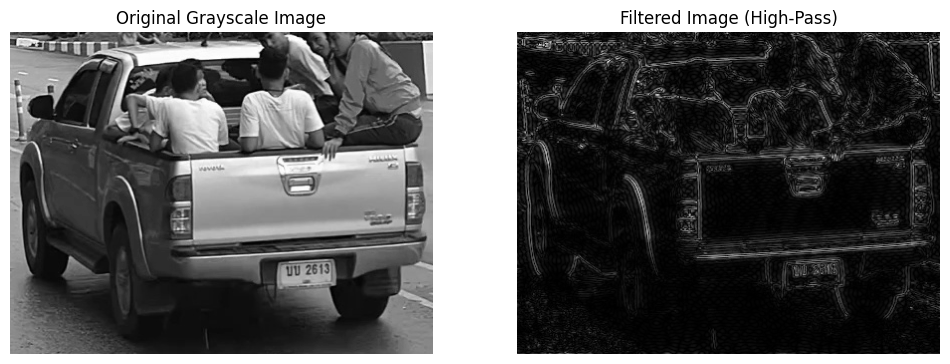

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

image_path = select_random_image() 
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)  

rows, cols = grayscale_image.shape
crow, ccol = rows // 2, cols // 2  
radius = 50  

high_pass_filter = np.ones((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
high_pass_filter[mask_area] = 0 

dft_filtered = dft_shifted * high_pass_filter

dft_filtered_shifted_back = ifftshift(dft_filtered)
filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.axis('off')

plt.show()



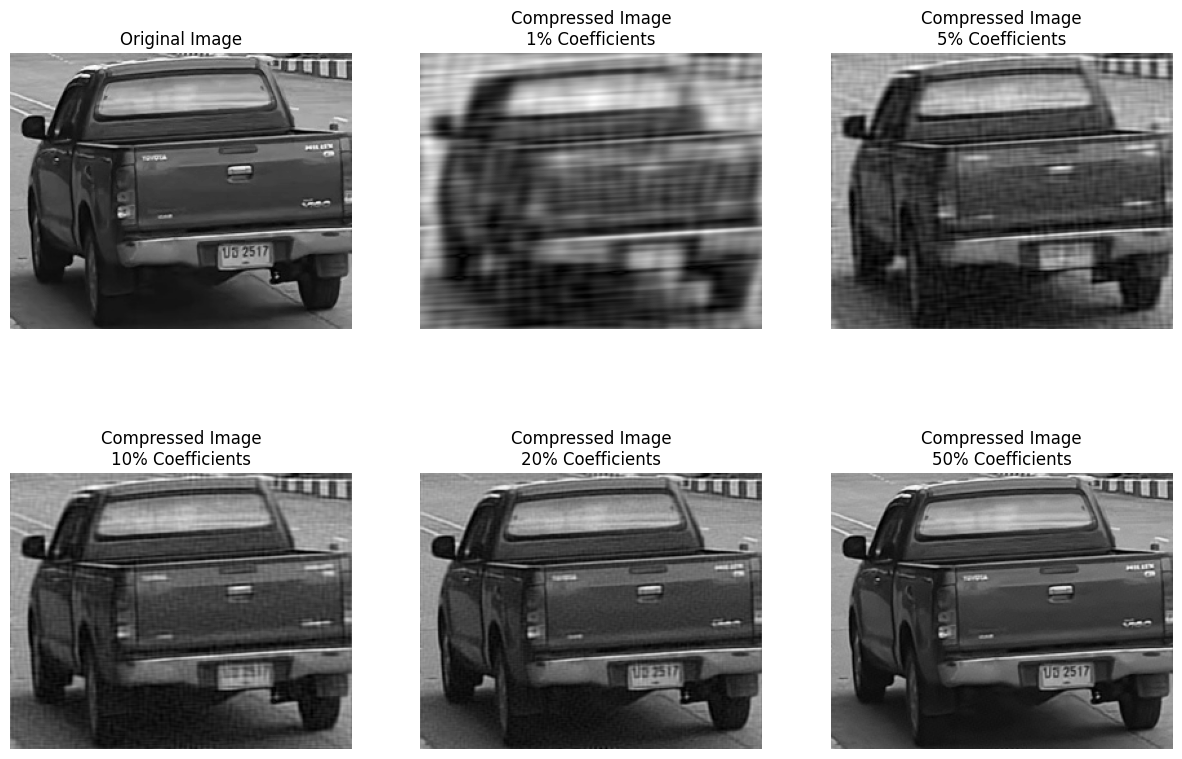

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

def compress_image(image, percentage):
    dft = fft2(image)
    dft_shifted = fftshift(dft)  

    flattened_dft = np.abs(dft_shifted).flatten()
    threshold = np.percentile(flattened_dft, 100 - percentage)

    mask = np.abs(dft_shifted) > threshold
    dft_compressed = dft_shifted * mask

    dft_compressed_shifted_back = ifftshift(dft_compressed)
    compressed_image = np.abs(ifft2(dft_compressed_shifted_back))

    return compressed_image

image_path = select_random_image()  
image = io.imread(image_path)
grayscale_image = color.rgb2gray(image)

percentages = [1, 5, 10, 20, 50]

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, percentage in enumerate(percentages):
    compressed_image = compress_image(grayscale_image, percentage)
    
    plt.subplot(2, 3, i + 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'Compressed Image\n{percentage}% Coefficients')
    plt.axis('off')

plt.show()
